In [1]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "BioSequences",
    "Kmers",
    "Graphs",
    "MetaGraphs",
    "SparseArrays",
    "ProgressMeter",
    "Distributions",
    "HiddenMarkovModels",
    "BioAlignments",
    "StatsBase",
    "Random",
    "StatsPlots",
    "Statistics",
    # "GraphMakie",
    "IterTools",
    "Primes",
    "OnlineStats",
    "IteratorSampling",
    "HypothesisTests",
    "Clustering",
    "Distances",
    "BioAlignments",
    "Statistics",
    "Primes"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [3]:
working_dir = joinpath(data_dir, "test")
mkpath(working_dir)

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/test"

In [4]:
# short_read_sets = unique(map(x -> match(r"^(.+\.\d+x)\.", x).captures[1], filter(x -> occursin(r"\.fna\.art", x) && occursin(r"\.fq\.gz", x) && !occursin("trimming_report", x) && !occursin("_val_", x), sort(readdir(genome_dir, join=true), by=x->filesize(x)))))
# # forward = short_read_set * ".1_val_1.fq.gz"
# # reverse = short_read_set * ".2_val_2.fq.gz"

In [5]:
long_read_fastqs = sort(filter(x -> occursin(r"\.filtlong\.fq\.gz$", x), readdir(genome_dir, join=true)), by=x->filesize(x))
# fastq = long_read_fastqs[1]
# fastq = long_read_fastqs[2]
fastq = long_read_fastqs[3]

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.fq.gz"

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 304], [0, 1, 9, 30, 32], false)
  4.585466 seconds (1.46 M allocations: 92.621 MiB, 3.02% gc time, 99.98% compilation time)
(k, predicted_saturation) = (3, 1.0)


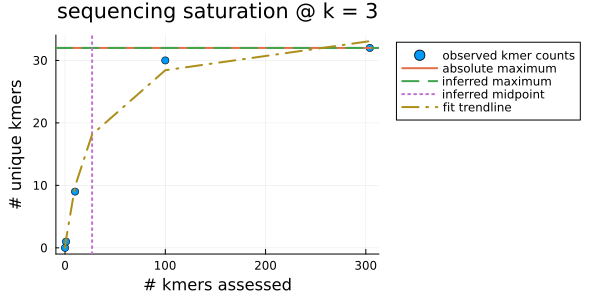

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 5, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 4622], [0, 1, 10, 87, 410, 512], false)
  0.000091 seconds (245 allocations: 23.000 KiB)
(k, predicted_saturation) = (5, 1.0)


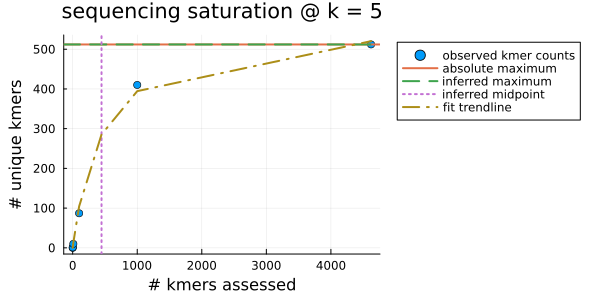

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 7, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 98353], [0, 1, 10, 98, 904, 4870, 7707], true)
  0.000081 seconds (194 allocations: 18.016 KiB)
(k, predicted_saturation) = (7, 0.9407958984375)


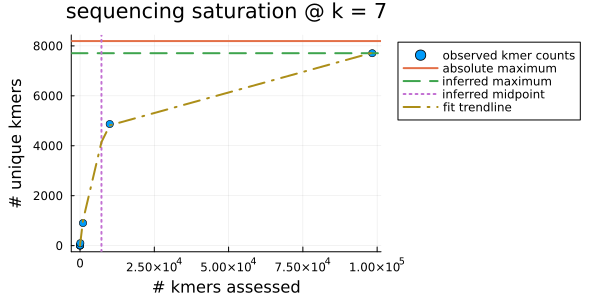

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 11, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 98301], [0, 1, 10, 100, 998, 8655, 40681], true)
  0.000163 seconds (214 allocations: 19.922 KiB)
(k, predicted_saturation) = (11, 0.019398212432861328)


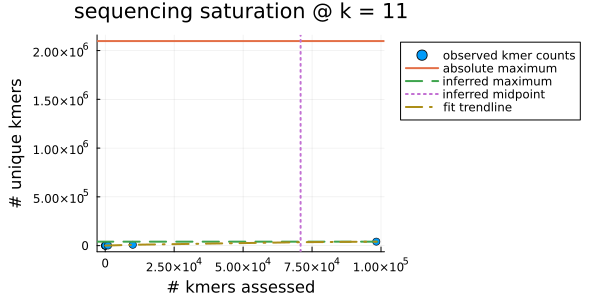

[ Info: polishing with k = 11
Progress:  15%|██████▎                                  |  ETA: 1:06:20

KeyError: KeyError: key "usage_request" not found

Progress: 100%|█████████████████████████████████████████| Time: 2:29:49
[ Info: polishing with k = 13
Progress: 100%|█████████████████████████████████████████| Time: 1:48:23
[ Info: polishing with k = 17
Progress: 100%|█████████████████████████████████████████| Time: 0:08:00
[ Info: polishing with k = 19
Progress: 100%|█████████████████████████████████████████| Time: 0:03:54
[ Info: polishing with k = 23
Progress: 100%|█████████████████████████████████████████| Time: 0:02:18
[ Info: polishing with k = 31
Progress: 100%|█████████████████████████████████████████| Time: 0:01:29
[ Info: polishing with k = 53
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13
[ Info: polishing with k = 89
Progress: 100%|█████████████████████████████████████████| Time: 0:01:18


8-element Vector{@NamedTuple{fastq::String, k::Int64}}:
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.fq.gz", k = 11)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.fq.gz", k = 13)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.fq.gz", k = 17)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.fq.gz", k = 19)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.fq.gz

In [7]:
# 1 hour runtime
polishing_results = Mycelia.iterative_polishing(fastq)

In [9]:
assembly_fastq = last(polishing_results).fastq

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

In [ ]:
assembly_k = last(polishing_results).k

In [16]:
assembly_fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"
assembly_k = 89

89

In [17]:
mean_read_length = Statistics.mean([length(FASTX.sequence(record)) for record in Mycelia.open_fastx(assembly_fastq)])

7148.0

In [18]:
# assembly_k = maximum(filter(k -> k < mean_read_length/2, Mycelia.ks()))

In [19]:
assembly_ks_to_try = filter(k -> k < mean_read_length/2, Mycelia.ks())
assembly_ks_to_try = filter(k -> k >= assembly_k, assembly_ks_to_try)

8-element Vector{Int64}:
   89
  139
  233
  379
  607
  983
 1597
 2579

In [20]:
for k in assembly_ks_to_try
    kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)
    initial_connected_components = length(Graphs.connected_components(kmer_graph))
    @show initial_connected_components
end

initial_connected_components = 2
initial_connected_components = 2
initial_connected_components = 2
initial_connected_components = 2
initial_connected_components = 2
initial_connected_components = 2
initial_connected_components = 2
initial_connected_components = 2


In [64]:
# assembly_k = 2579 too high?

# assembly_k = 89
# assembly_k = 139
# assembly_k = 233
# assembly_k = 379

# so many overlaps found!
 # 9500
 # 9923
assembly_k = 607

# same assembly as below, no overlaps
 # 9505
 # 9923
# assembly_k = 983

# same assembly as 2579, still no overlaps
 # 9505
 # 9923
# assembly_k = 1597
# good assembly but no overlaps found
 # 9505
 # 9923
# assembly_k = 2579

607

In [65]:
kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)

{23945, 23950} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [66]:
# heuristic - should be based on something better or removed altogether
max_filter = 5

initial_connected_components = length(Graphs.connected_components(kmer_graph))
coverage_threshold = 1
tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
while (length(Graphs.connected_components(candidate_subgraph)) == initial_connected_components) && (coverage_threshold < max_filter)
    coverage_threshold += 1
    tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
    candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
end
coverage_threshold -= 1
@show coverage_threshold

tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
filtered_graph, filtered_graph_vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
# candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, [v for v in Graphs.vertices(kmer_graph) if kmer_graph.vprops[v][:count] >= coverage_threshold])

coverage_threshold = 0


({23945, 23950} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  23936, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944, 23945])

In [67]:
connected_components = sort(Graphs.connected_components(filtered_graph), by=x->length(x), rev=true)

2-element Vector{Vector{Int64}}:
 [3, 12, 13, 16, 17, 19, 20, 21, 34, 38  …  23935, 23936, 23937, 23938, 23939, 23940, 23941, 23942, 23944, 23945]
 [1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  23901, 23902, 23904, 23905, 23906, 23926, 23927, 23928, 23934, 23943]

In [68]:
length.(connected_components)

2-element Vector{Int64}:
 12529
 11416

In [69]:
connected_component_sequences = BioSequences.LongDNA{2}[]
for connected_component in connected_components
    connected_component_subgraph, connected_component_subgraph_vertex_map = Graphs.induced_subgraph(filtered_graph, connected_component)
    sorted_connected_component_subgraph = Graphs.topological_sort_by_dfs(connected_component_subgraph)
    dsp_result = Graphs.dijkstra_shortest_paths(connected_component_subgraph, first(sorted_connected_component_subgraph))
    maxdist, maxdist_index = findmax(map(d -> d == Inf ? zero(d) : d, dsp_result.dists))
    connected_component_subgraph_longest_path = Graphs.enumerate_paths(dsp_result, maxdist_index)
    # @show connected_component_subgraph_longest_path
    original_graph_kmer_indices = filtered_graph_vertex_map[connected_component_subgraph_vertex_map[connected_component_subgraph_longest_path]]
    connected_component_subgraph_longest_path_reconstructed_sequence = Mycelia.kmer_path_to_sequence(kmer_graph.gprops[:ordered_kmers][original_graph_kmer_indices])
    push!(connected_component_sequences, connected_component_subgraph_longest_path_reconstructed_sequence)
end
connected_component_sequences

2-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 TGGACATCTTTTCTGACCTTGCCCATGTCATTGAGGAAA…GAGGTGATCCCAACAGCAATCCTACAGGCAGCCTCTTGA
 CTCAAGAGGCTGCCTGTAGGATTGCTGTTGGGATCACCT…CCTGTCACAGAGTGGACCGATGTTCCATACTTGGGAAAG

In [70]:
length.(connected_component_sequences)

2-element Vector{Int64}:
 9500
 9923

In [71]:
first_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[1]))))

8894-element Vector{Kmers.DNAKmer{607, 19}}:
 TGGACATCTTTTCTGACCTTGCCCATGTCATTGAGGAAA…AGAGTTCTCTCTGCTTAACCAGTGGTCTTCATTGAGGAA
 CTTCCTCAATGAAGACCACTGGTTAAGCAGAGAGAACTC…ATTTCCTCAATGACATGGGCAAGGTCAGAAAAGATGTCC
 GACATCTTTTCTGACCTTGCCCATGTCATTGAGGAAATT…AGTTCTCTCTGCTTAACCAGTGGTCTTCATTGAGGAAGC
 ACATCTTTTCTGACCTTGCCCATGTCATTGAGGAAATTC…GTTCTCTCTGCTTAACCAGTGGTCTTCATTGAGGAAGCC
 CATCTTTTCTGACCTTGCCCATGTCATTGAGGAAATTCA…TTCTCTCTGCTTAACCAGTGGTCTTCATTGAGGAAGCCC
 ATCTTTTCTGACCTTGCCCATGTCATTGAGGAAATTCAG…TCTCTCTGCTTAACCAGTGGTCTTCATTGAGGAAGCCCA
 TCTTTTCTGACCTTGCCCATGTCATTGAGGAAATTCAGT…CTCTCTGCTTAACCAGTGGTCTTCATTGAGGAAGCCCAA
 CTTTTCTGACCTTGCCCATGTCATTGAGGAAATTCAGTG…TCTCTGCTTAACCAGTGGTCTTCATTGAGGAAGCCCAAC
 TGTTGGGCTTCCTCAATGAAGACCACTGGTTAAGCAGAG…GCACTGAATTTCCTCAATGACATGGGCAAGGTCAGAAAA
 TTGTTGGGCTTCCTCAATGAAGACCACTGGTTAAGCAGA…TGCACTGAATTTCCTCAATGACATGGGCAAGGTCAGAAA
 GTTGTTGGGCTTCCTCAATGAAGACCACTGGTTAAGCAG…ATGCACTGAATTTCCTCAATGACATGGGCAAGGTCAGAA
 AGTTGTTGGGCTTCCTCAATGAAGACCACTGGTTAAGCA…TATGCACTGAATTTCCTCAATGA

In [72]:
second_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[2]))))

9317-element Vector{Kmers.DNAKmer{607, 19}}:
 CGTCGATGATCTGGTCTCCTACTTTTGTGAGGCATGAGA…AGGTGATCCCAACAGCAATCCTACAGGCAGCCTCTTGAG
 ACGTCGATGATCTGGTCTCCTACTTTTGTGAGGCATGAG…GAGGTGATCCCAACAGCAATCCTACAGGCAGCCTCTTGA
 CAAGAGGCTGCCTGTAGGATTGCTGTTGGGATCACCTCC…TCATGCCTCACAAAAGTAGGAGACCAGATCATCGACGTG
 AAGAGGCTGCCTGTAGGATTGCTGTTGGGATCACCTCCG…CATGCCTCACAAAAGTAGGAGACCAGATCATCGACGTGG
 AGAGGCTGCCTGTAGGATTGCTGTTGGGATCACCTCCGA…ATGCCTCACAAAAGTAGGAGACCAGATCATCGACGTGGC
 AGCCACGTCGATGATCTGGTCTCCTACTTTTGTGAGGCA…ATCGGAGGTGATCCCAACAGCAATCCTACAGGCAGCCTC
 AAGCCACGTCGATGATCTGGTCTCCTACTTTTGTGAGGC…GATCGGAGGTGATCCCAACAGCAATCCTACAGGCAGCCT
 CAAGCCACGTCGATGATCTGGTCTCCTACTTTTGTGAGG…TGATCGGAGGTGATCCCAACAGCAATCCTACAGGCAGCC
 GCTGCCTGTAGGATTGCTGTTGGGATCACCTCCGATCAA…CTCACAAAAGTAGGAGACCAGATCATCGACGTGGCTTGA
 CTGCCTGTAGGATTGCTGTTGGGATCACCTCCGATCAAA…TCACAAAAGTAGGAGACCAGATCATCGACGTGGCTTGAA
 ATTCAAGCCACGTCGATGATCTGGTCTCCTACTTTTGTG…TTTTGATCGGAGGTGATCCCAACAGCAATCCTACAGGCA
 GATTCAAGCCACGTCGATGATCTGGTCTCCTACTTTTGT…ATTTTGATCGGAGGTGATCCCAA

In [73]:
intersect(first_sequence_canonical_kmers, second_sequence_canonical_kmers)

402-element Vector{Kmers.DNAKmer{607, 19}}:
 AGCGATGCTTGCAGGATCTGTGAAGTGGGCCTCATCCAT…GACATTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAG
 ACTGATAGCGGTCGCCCCAGGTGAGCGCGCCAGAAATGT…AATGGATGAGGCCCACTTCACAGATCCTGCAAGCATCGC
 AACTGATAGCGGTCGCCCCAGGTGAGCGCGCCAGAAATG…TAATGGATGAGGCCCACTTCACAGATCCTGCAAGCATCG
 CAACTGATAGCGGTCGCCCCAGGTGAGCGCGCCAGAAAT…ATAATGGATGAGGCCCACTTCACAGATCCTGCAAGCATC
 ATGCTTGCAGGATCTGTGAAGTGGGCCTCATCCATTATA…TTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGG
 TCCAACTGATAGCGGTCGCCCCAGGTGAGCGCGCCAGAA…ATATAATGGATGAGGCCCACTTCACAGATCCTGCAAGCA
 GCTTGCAGGATCTGTGAAGTGGGCCTCATCCATTATATA…TCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGGAC
 AGTCCAACTGATAGCGGTCGCCCCAGGTGAGCGCGCCAG…ATATATAATGGATGAGGCCCACTTCACAGATCCTGCAAG
 AAGTCCAACTGATAGCGGTCGCCCCAGGTGAGCGCGCCA…TATATATAATGGATGAGGCCCACTTCACAGATCCTGCAA
 GAAGTCCAACTGATAGCGGTCGCCCCAGGTGAGCGCGCC…CTATATATAATGGATGAGGCCCACTTCACAGATCCTGCA
 GCAGGATCTGTGAAGTGGGCCTCATCCATTATATATAGA…GCGCGCTCACCTGGGGCGACCGCTATCAGTTGGACTTCC
 CAGGATCTGTGAAGTGGGCCTCATCCATTATATATAGAT…CGCGCTCACCTGGGGCGACCGCTA

In [ ]:
# skip second because it's so similar to the first

In [76]:
import BioAlignments
scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1)
forward_alignment = BioAlignments.pairalign(BioAlignments.OverlapAlignment(), connected_component_sequences[1], connected_component_sequences[2], scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 12069
  seq:    1 TGGACATCTTTTCT---GA--CCTTGCCCATGTCATTGAGGAAATT-CAGTGCATAGGCG   54
                        ||   ||  |  ||||  |||     ||||  || | ||   | || |
  ref:    0 ------------CTCAAGAGGC--TGCC--TGT-----AGGA--TTGCTGT---T-GG-G   32

  seq:   55 A--ACCT---ATCA------TCC-----AT--TGGT-TTC--ACGAC--ACAGTCA-T--   88
            |  ||||   ||||      |||     ||  |||  |||  ||||   |||| || |  
  ref:   33 ATCACCTCCGATCAAAATGATCCTGGCCATACTGGCATTCCTACGATTTACAG-CAATAA   91

  seq:   88 --C--TCCACTGGGCG----AGACAGA-GCGGA---GTCTGTC----------CCATCCA  126
              |  |||||||| |     | ||||| | |||   ||  | |          ||||| |
  ref:   92 AACCGTCCACTGGCCTCATCA-ACAGATGGGGAAAAGTGGG-CAAAAAAGAGGCCATCAA  149

  seq:  127 TTTCCTTCTAGCCAA--TTGA----TGACTTT----CCATG--G-GTTTTGGAGCTCCTC  173
              |||| | |  |||  || |    |||| |     |||||  | ||

In [81]:
BioAlignments.score(forward_alignment)

12069

In [82]:
reverse_complement_alignment = BioAlignments.pairalign(BioAlignments.OverlapAlignment(), connected_component_sequences[1], BioSequences.reverse_complement(connected_component_sequences[2]), scoremodel)

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 45945
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 CTTTCCCAAGTATGGAACATCGGTCCACTCTGTGACAGGGGTCTTGTCCTCCATGTACTC   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 ATTCTCTAAACCCACACTCTGTTCCATACCTCTAGCATGTCCTCTGTTGTCATCCACTCT  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 CCACGCCCATGGATGGACAGGTTGTTGTGAAGCTCGAATCGCAACTCACCGGTACAGCAG  180

  seq:    0 ------------------------------------------------------------    0
                                                           

In [91]:
# take the longer of the two!
connected_component_sequences = sort(connected_component_sequences, by=x->length(x), rev=true)[1:1]

1-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 CTCAAGAGGCTGCCTGTAGGATTGCTGTTGGGATCACCT…CCTGTCACAGAGTGGACCGATGTTCCATACTTGGGAAAG

In [92]:
assembly_fasta = replace(assembly_fastq, Mycelia.FASTQ_REGEX => ".assembly_k$(assembly_k).fna")

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.badread.10x.filtlong.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k607.fna"

In [93]:
open(assembly_fasta, "w") do io
    fastx_io = FASTX.FASTA.Writer(io)
    for (i, sequence) in enumerate(connected_component_sequences)
        identifier = "contig$(i)_length=$(length(sequence))"
        fasta_record = FASTX.FASTA.Record(identifier, sequence)
        write(fastx_io, fasta_record)
    end
    close(fastx_io)
end

In [ ]:
# readlines(assembly_fasta)